In [ ]:
from fastai2.basics import *
from fastai2.vision.all import *
from pycocotools.coco import COCO
import seaborn as sns

In [ ]:
# all_skip

# EDA
>

## Validation set

In [ ]:
val_img_path = Path('/root/data/coco/val2014')
val_anno_path = Path('/root/data/coco/annotations/captions_val2014.json')
val_coco = COCO(val_anno_path)

loading annotations into memory...
Done (t=0.30s)
creating index...
index created!


### Captions

In [ ]:
val_captions = [ann['caption'] for ann in val_coco.dataset['annotations']]
val_captions[:3]

['A bicycle replica with a clock as the front wheel.',
 'A black Honda motorcycle parked in front of a garage.',
 'A room with blue walls and a white sink and door.']

In [ ]:
df_val_captions = pd.DataFrame({'caption': val_captions})
df_val_captions.head(2)

,caption
0,A bicycle replica with a clock as the front wheel.
1,A black Honda motorcycle parked in front of a garage.


In [ ]:
df_val_captions['len'] = df_val_captions.caption.apply(lambda x: len(x.split()))
df_val_captions[:2]

,caption,len
0,A bicycle replica with a clock as the front wheel.,10
1,A black Honda motorcycle parked in front of a garage.,10


In [ ]:
df_val_captions.describe()

,len
count,202654.000000
mean,10.452624
std,2.375207
min,6.000000
25%,9.000000
50%,10.000000
75%,11.000000
max,50.000000


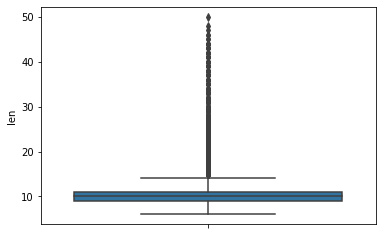

In [ ]:
sns.boxplot(y='len', data=df_val_captions)

### Images

In [ ]:
val_img_fnames = [img['file_name'] for img in val_coco.dataset['images']]
val_img_fnames[:3]

['COCO_val2014_000000391895.jpg',
 'COCO_val2014_000000522418.jpg',
 'COCO_val2014_000000184613.jpg']

In [ ]:
val_img_widths = [img['width'] for img in val_coco.dataset['images']]
val_img_widths[:3]

[640, 640, 500]

In [ ]:
val_img_heights = [img['height'] for img in val_coco.dataset['images']]
val_img_heights[:3]

[360, 480, 336]

In [ ]:
df_val_images = pd.DataFrame({'fname': val_img_fnames, 'width': val_img_widths, 'height': val_img_heights})
df_val_images[:2]

,fname,width,height
0,COCO_val2014_000000391895.jpg,640,360
1,COCO_val2014_000000522418.jpg,640,480


In [ ]:
df_val_images.describe()

,width,height
count,40504.000000,40504.000000
mean,576.541477,485.069944
std,91.872464,97.766584
min,120.000000,111.000000
25%,500.000000,426.000000
50%,640.000000,480.000000
75%,640.000000,531.000000
max,640.000000,640.000000


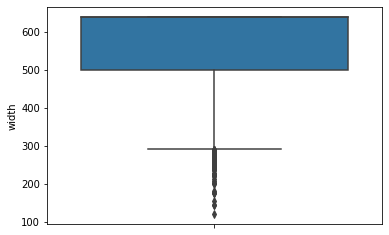

In [ ]:
sns.boxplot(y='width', data=df_val_images)

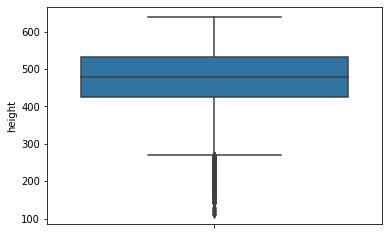

In [ ]:
sns.boxplot(y='height', data=df_val_images)